In [1]:
# main plotting library
import matplotlib.pyplot as plt

# for linear algebra calculations 
import numpy as np
from itertools import product

# for 3d plots
from mpl_toolkits.mplot3d import Axes3D, art3d

# for rendering points on 3d plots
from matplotlib.patches import Circle

# for interactive visuals
from ipywidgets import interact, IntSlider, fixed

# for animations
from matplotlib.animation import FuncAnimation

# for comparisons
from math import inf #this is Infinity in JS

# importing the code from the main notebook
import nbimporter
from Linear_Regression_Tutorial import animate_parabola_tangents, graph_line, graph_data_line_surface_loss, graph_data_line_loss, loss_maker, animateTriPlot, randomChooser, gradientDescentChooser, generate_random_linear_data

Importing Jupyter notebook from Linear_Regression_Tutorial.ipynb


# Linear Regression

This notebook pulls out the interesting interactive pieces from the Linear_Regression_Tutorial Notebook for the purpose of having a concise presentation of the key points of Linear Regression without having to look at all of it's guts. It was mainly developed so that it could be used during a lecture to give the main idea without getting lost in the weeds of implementation details.

In [2]:
%matplotlib inline

In [3]:
interact(graph_line, slope=1.0, y_intercept=2)

interactive(children=(FloatSlider(value=1.0, description='slope', max=3.0, min=-1.0), IntSlider(value=2, descr…

<function Linear_Regression_Tutorial.graph_line(slope, y_intercept)>

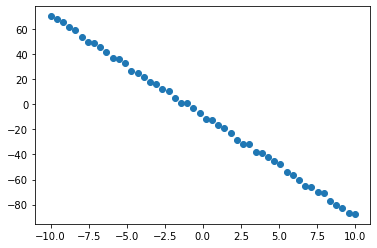

In [4]:
# run this cell to generate new data for the animations
SECRET_SLOPE, SECRET_INTERCEPT = np.random.randint(-10, 10), np.random.randint(-10, 10)
SECRET_DATA = generate_random_linear_data(SECRET_SLOPE, SECRET_INTERCEPT, 50, 2)

X, Y = SECRET_DATA
plt.scatter(X, Y)

In [5]:
interact(
    graph_data_line_loss, 
    data=fixed(SECRET_DATA),
    slope=IntSlider(min=-10, max=10, step=1, value=0), 
    y_intercept=IntSlider(min=-10, max=10, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='slope', max=10, min=-10), IntSlider(value=0, description…

<function Linear_Regression_Tutorial.graph_data_line_loss(data, slope, y_intercept)>

In [6]:
print(SECRET_SLOPE, SECRET_INTERCEPT)

-8 -9


In [7]:
interact(
    graph_data_line_surface_loss, 
    data=fixed(SECRET_DATA),
    slope=IntSlider(min=-10, max=10, step=1, value=0), 
    y_intercept=IntSlider(min=-10, max=10, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='slope', max=10, min=-10), IntSlider(value=0, description…

<function Linear_Regression_Tutorial.graph_data_line_surface_loss(data, slope, y_intercept)>

In [11]:
%matplotlib notebook

In [12]:
# run this cell to generate new data for the animations
SECRET_SLOPE, SECRET_INTERCEPT = np.random.randint(-10, 10), np.random.randint(-10, 10)
animation_data = generate_random_linear_data(SECRET_SLOPE, SECRET_INTERCEPT, 50, 2)

<IPython.core.display.Javascript object>


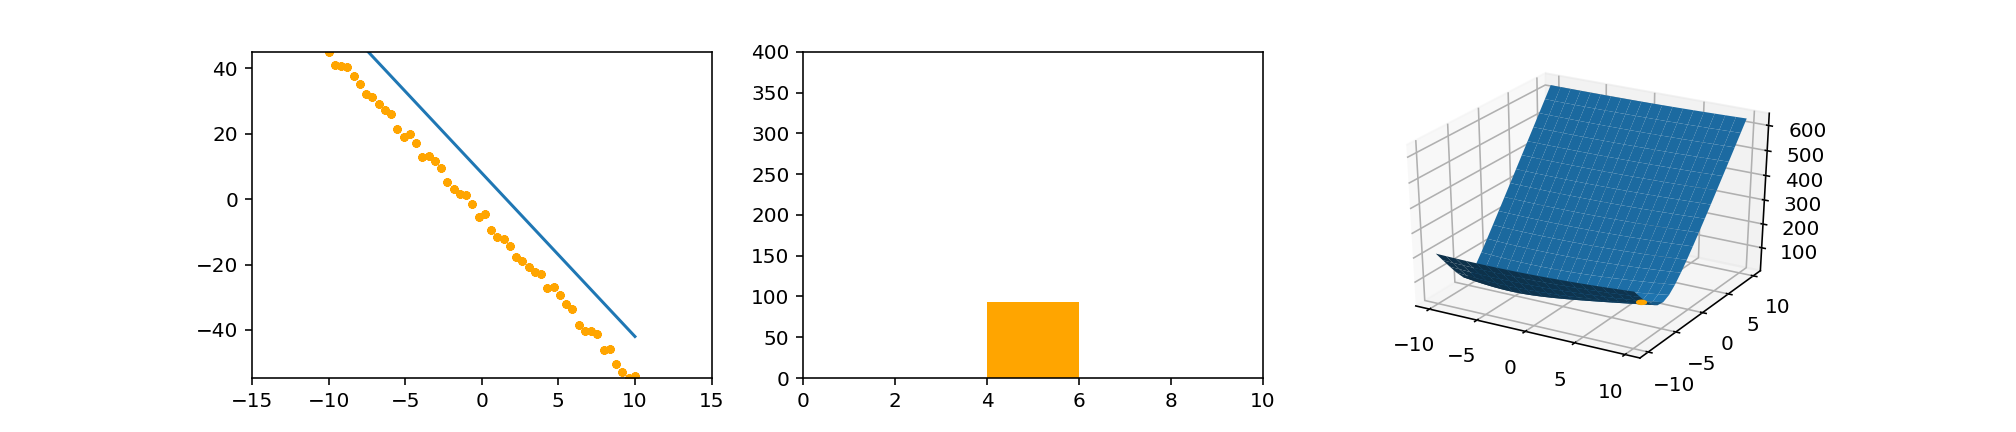

In [13]:
rand_initial_state = {
    'loss_function': loss_maker(animation_data), 
    'best_pair': (None, None), 
    'best_value': inf, 
    'last_step': 9, 
    'current_step': 0,
}


animateTriPlot(animation_data, randomChooser, initial_state=rand_initial_state)

<IPython.core.display.Javascript object>


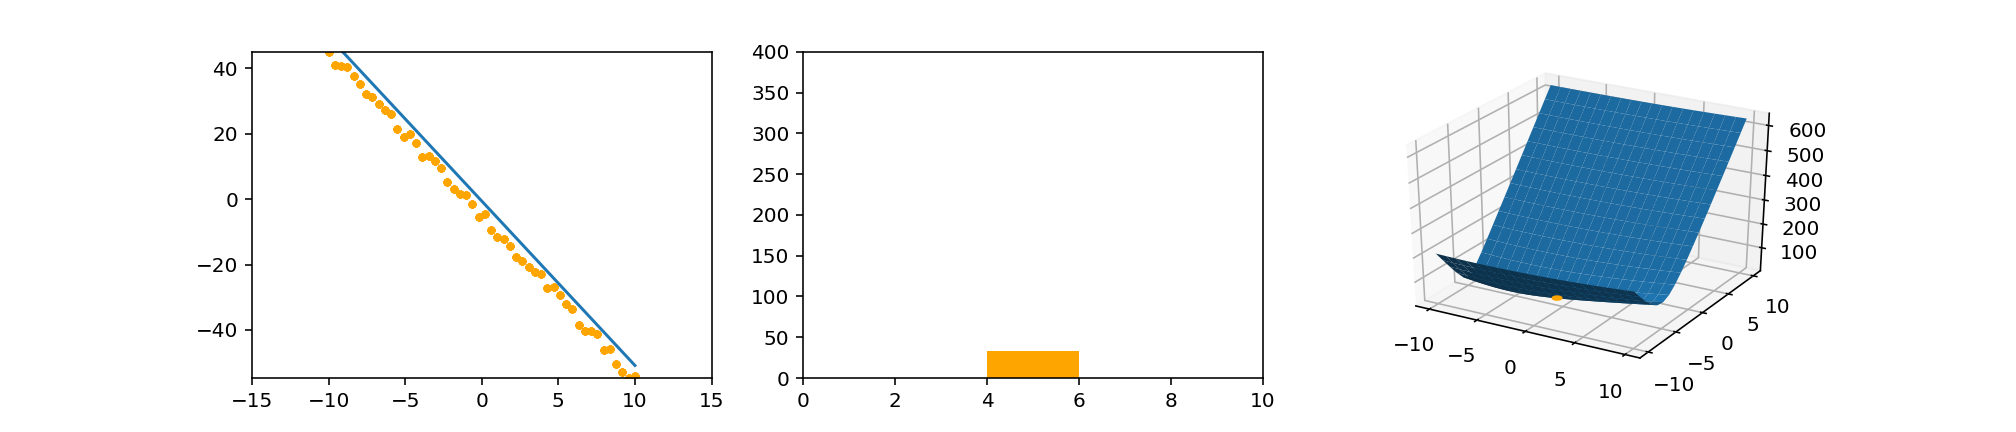

In [14]:
GD_initial_state = {
    'first_step': True,
    'data': animation_data,
    'current_pair': (0, 0),
    'learning_rate': 0.015,
}

animateTriPlot(animation_data, gradientDescentChooser, initial_state=GD_initial_state, steps=5, delay=50)

<IPython.core.display.Javascript object>


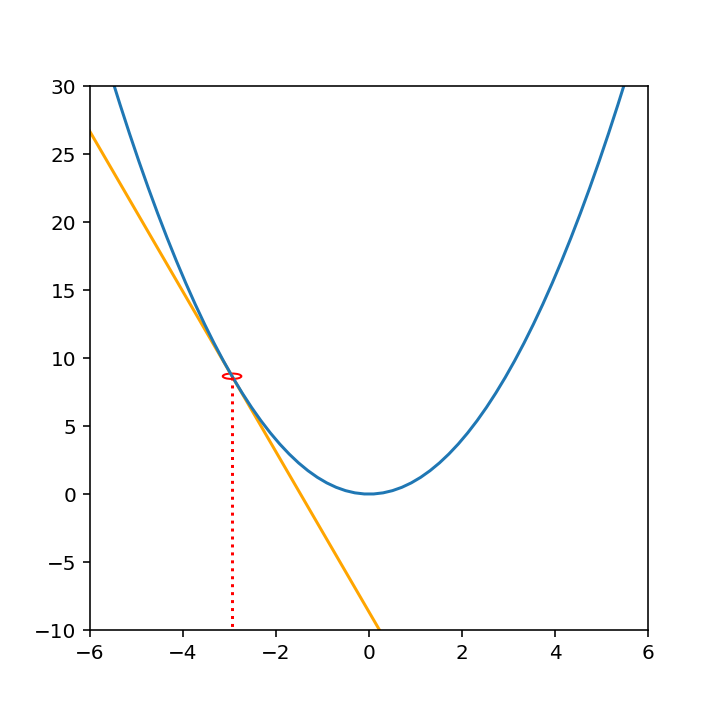

In [16]:
animate_parabola_tangents()